In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
X = np.load('./X.npy')
y = np.load('./y.npy')

In [3]:
# 데이터 정규화 (0~1 범위로)
X = X.astype('float32') / 255.0

# 데이터 분리 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train data shape:", X_train.shape)  # (samples, height, width, channels)
print("Test data shape:", X_test.shape)

Train data shape: (2220, 64, 64, 3)
Test data shape: (555, 64, 64, 3)


In [4]:
# CNN 모델 구축
model = Sequential()

# 입력층
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(64, 64, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 중간층
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 출력층
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


C:\Users\goode\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,209 (16.08 MB)

 Trainable params: 4,214,209 (16.08 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델 저장 경로
model_dir = './saved_model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# `.keras` 확장자로 변경
model_path = os.path.join(model_dir, 'turtle_neck_model.keras')

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])


Epoch 1/50
69/70 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9826 - loss: 0.0421
Epoch 1: val_loss improved from inf to 0.11864, saving model to ./saved_model\turtle_neck_model.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9826 - loss: 0.0422 - val_accuracy: 0.9604 - val_loss: 0.1186
Epoch 2/50
69/70 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9771 - loss: 0.0526
Epoch 2: val_loss did not improve from 0.11864
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9772 - loss: 0.0524 - val_accuracy: 0.9441 - val_loss: 0.1272
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9846 - loss: 0.0410
Epoch 3: val_loss improved from 0.11864 to 0.10434, saving model to ./saved_model\turtle_neck_model.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9847 - loss: 0.0410 - val_accuracy: 0.9532 - val_loss: 0.1043
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9878 - loss: 0.0394
Epoch 4: val_loss improved from 0.10434 to 0.09896, savin

테스트 정확도: 0.9514


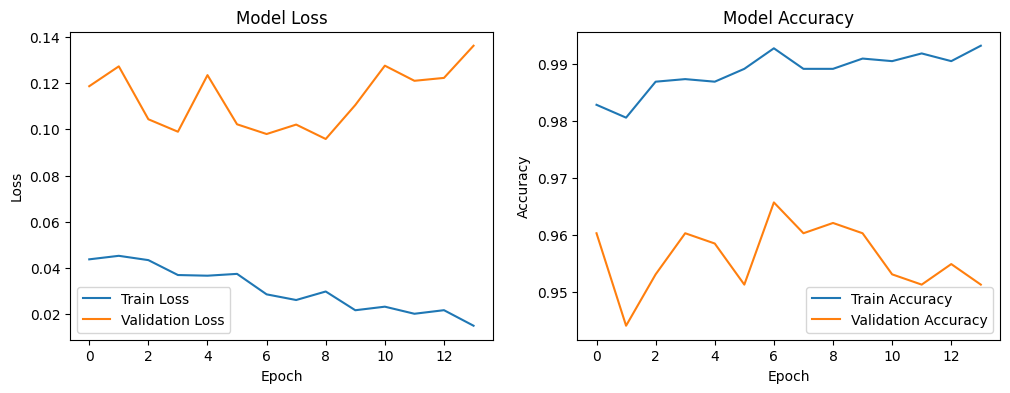

In [9]:
# 모델 평가
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"테스트 정확도: {accuracy:.4f}")

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 손실 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [10]:
# 예측 및 평가
y_pred = model.predict(X_test)
y_pred = [0 if y < 0.5 else 1 for y in y_pred]

# 혼동행렬 및 분류 보고서 출력
print("혼동 행렬:")
print(confusion_matrix(y_test, y_pred))

print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

# R2 점수 계산
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
혼동 행렬:
[[209  19]
 [  8 319]]

분류 보고서:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       228
           1       0.94      0.98      0.96       327

    accuracy                           0.95       555
   macro avg       0.95      0.95      0.95       555
weighted avg       0.95      0.95      0.95       555

R-squared Score: 0.7990


In [6]:
# 최종 모델 저장
model.save('./turtle_neck_model.h5')

NameError: name 'model' is not defined